In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.layers import LSTM, Dropout, GRU
import tensorflow as tf
from scipy.stats import zscore 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [22]:
df = pd.read_csv('/Users/tybillchou/Documents/projectpm25/pm25/new/lt_106107_pm25_comp.csv',encoding='utf-8')

In [23]:
df

,Unnamed: 0,ID,station,Year,Month,Day,Time,AMB_TEMP,CO,NO,...,O3,PM10,PM2.5,RAINFALL,RH,SO2,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,0,lt2017010100,龍潭,2017,1,1,0,18,0.20,0,...,34,25,16,0,77,2,東北,東,緩風,緩風
1,1,lt2017010101,龍潭,2017,1,1,1,18,0.22,0,...,33,20,13,0,79,1,東北,東,微風,微風
2,2,lt2017010102,龍潭,2017,1,1,2,18,0.23,0,...,31,23,16,0,80,1,東,東北,微風,微風
3,3,lt2017010103,龍潭,2017,1,1,3,17,0.28,0,...,26,25,9,0,82,1,西北,西南,微風,微風
4,4,lt2017010104,龍潭,2017,1,1,4,17,0.31,1,...,25,29,17,0,84,1,東北,東北,微風,無風
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17512,17512,lt2018123116,龍潭,2018,12,31,16,15,0.24,1,...,34,10,13,0,95,2,東北,東北,緩風,緩風
17513,17513,lt2018123117,龍潭,2018,12,31,17,15,0.24,1,...,34,11,17,0,95,2,東北,東北,緩風,緩風
17514,17514,lt2018123118,龍潭,2018,12,31,18,15,0.25,1,...,33,8,13,0,95,1,東北,東北,緩風,緩風
17515,17515,lt2018123119,龍潭,2018,12,31,19,15,0.22,1,...,34,6,4,0,95,2,東北,東北,緩風,緩風


In [30]:
df.loc[:10,'WD_HR':'WS_HR']

,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,7,0,2,2
1,7,0,1,1
2,0,7,1,1
3,5,3,1,1
4,7,7,1,0
5,3,3,1,0
6,3,2,1,1
7,0,7,1,1
8,0,0,1,1
9,7,7,1,1


In [29]:
df['WD_HR'].replace({'東':0,'東南':1,'南':2,'西南':3,'西':4,'西北':5,'北':6,'東北':7},inplace=True)
df['WIND_DIREC'].replace({'東':0,'東南':1,'南':2,'西南':3,'西':4,'西北':5,'北':6,'東北':7},inplace=True)
df['WIND_SPEED'].replace({'無風':0,'微風':1,'緩風':2,'勁風':3},inplace=True)
df['WS_HR'].replace({'無風':0,'微風':1,'緩風':2,'勁風':3},inplace=True)

In [31]:
WD_HR_OHE = pd.get_dummies(df['WD_HR'],prefix=['WD_HR_OHE'])
WIND_DIREC_OHE = pd.get_dummies(df['WIND_DIREC'],prefix=['WIND_DIREC_OHE'])

In [32]:
df_OHE = pd.concat([df, WD_HR_OHE,WIND_DIREC_OHE], axis=1)

In [43]:
df_OHE.iloc[:10, -14:]

,['WD_HR_OHE']_0,['WD_HR_OHE']_1,['WD_HR_OHE']_2,['WD_HR_OHE']_3,['WD_HR_OHE']_5,['WD_HR_OHE']_6,['WD_HR_OHE']_7,['WIND_DIREC_OHE']_0,['WIND_DIREC_OHE']_1,['WIND_DIREC_OHE']_2,['WIND_DIREC_OHE']_3,['WIND_DIREC_OHE']_5,['WIND_DIREC_OHE']_6,['WIND_DIREC_OHE']_7
0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,1
5,0,0,0,1,0,0,0,0,0,0,1,0,0,0
6,0,0,0,1,0,0,0,0,0,1,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,1
8,1,0,0,0,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [19]:
df_OHE.iloc[1]

Unnamed: 0                         1
ID                      lt2017010101
station                           龍潭
Year                            2017
Month                              1
Day                                1
Time                               1
AMB_TEMP                          18
CO                              0.22
NO                                 0
NOx                                6
O3                                33
PM10                              20
PM2.5                             13
RAINFALL                           0
RH                                79
SO2                                1
WD_HR                              7
WIND_DIREC                         0
WIND_SPEED                         1
WS_HR                              1
['WD_HR_OHE']_0                    0
['WD_HR_OHE']_1                    0
['WD_HR_OHE']_2                    0
['WD_HR_OHE']_3                    0
['WD_HR_OHE']_5                    0
['WD_HR_OHE']_6                    0
[

In [20]:
df_OHE.drop(df_OHE.columns[[0,1,2,3,4,5,6,19,20]], axis = 1, inplace = True) 

In [21]:
df_OHE.iloc[1]

AMB_TEMP                18.00
CO                       0.22
NO                       0.00
NOx                      6.00
O3                      33.00
PM10                    20.00
PM2.5                   13.00
RAINFALL                 0.00
RH                      79.00
SO2                      1.00
WD_HR                    7.00
WIND_DIREC               0.00
['WD_HR_OHE']_0          0.00
['WD_HR_OHE']_1          0.00
['WD_HR_OHE']_2          0.00
['WD_HR_OHE']_3          0.00
['WD_HR_OHE']_5          0.00
['WD_HR_OHE']_6          0.00
['WD_HR_OHE']_7          1.00
['WIND_DIREC_OHE']_0     1.00
['WIND_DIREC_OHE']_1     0.00
['WIND_DIREC_OHE']_2     0.00
['WIND_DIREC_OHE']_3     0.00
['WIND_DIREC_OHE']_5     0.00
['WIND_DIREC_OHE']_6     0.00
['WIND_DIREC_OHE']_7     0.00
Name: 1, dtype: float64

In [22]:
x = df_OHE.iloc[:,[0,1,2,3,4,5,6,10,11]]

In [23]:
x=np.array(x).astype(float)
x_nor=(x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0))

In [ ]:
# x=np.array(x).astype(float)
# from scipy.stats import zscore
# z_score = zscore(x)

In [24]:
x_OHE = df_OHE.iloc[:,12:]

In [26]:
x_final = np.concatenate((x_nor, x_OHE), axis=1)

In [27]:
x_final.shape

(17517, 23)

In [59]:
x_final

array([[0.43902439, 0.01949318, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.43902439, 0.0214425 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.43902439, 0.02241715, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.36585366, 0.02436647, 0.05882353, ..., 0.        , 0.        ,
        1.        ],
       [0.36585366, 0.0214425 , 0.05882353, ..., 0.        , 0.        ,
        1.        ],
       [0.36585366, 0.01851852, 0.05882353, ..., 0.        , 0.        ,
        1.        ]])

In [28]:
y = df_OHE.iloc[:,6]

In [29]:
y

0        16
1        13
2        16
3         9
4        17
         ..
17512    13
17513    17
17514    13
17515     4
17516     1
Name: PM2.5, Length: 17517, dtype: int64

In [30]:
y1 = []                
for i in y:
    if i<=11:
        y1.append(0)
    elif 11<i<=23:
        y1.append(1)
    elif 23<i<=35:
        y1.append(2)
    elif 36<i<=41:
        y1.append(3)
    elif 41<i<=47:
        y1.append(4)
    elif 47<i<=53:
        y1.append(5)
    elif 53<i<=58:
        y1.append(6)
    elif 58<i<=64:
        y1.append(7)
    elif 64<i<=70:
        y1.append(8)
    else:
        y1.append(9)
y1 = np.array(y1)

In [31]:
y1.shape

(17517,)

In [32]:
from keras.utils import np_utils
y2 = np_utils.to_categorical(y1,10)

In [33]:
y_train=y2[8:]

In [34]:
y_train.shape

(17509, 10)

In [35]:
def creat_dataset(ds, look_back=1):
    x_data = []
    for i in range(len(ds)-look_back):
        x_data.append(ds[i:(i+look_back), :])        
#         y_data.append(ds[i+look_back, 0])
    return np.array(x_data)# , np.array(y_data)

In [36]:
look_back = 8 
x_train = creat_dataset(x_final, look_back)
print('過去時數:', look_back)
print('x_train shape:', x_train.shape)
# print('y_train shape:', y_train.shape)

過去時數: 8
x_train shape: (17509, 8, 23)


In [37]:
np.random.seed(10)

In [ ]:
# sc = MinMaxScaler()

In [ ]:
# x_train_set = sc.fit_transform(x)

In [ ]:
# x_train_set.shape

In [39]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 23))
print('x_train.shape:', x_train.shape)

x_train.shape: (17509, 8, 23)


In [40]:
8752*0.8

7001.6

In [41]:
x_tr, y_tr = x_train[:7002], y_train[:7002]
x_test, y_test = x_train[7002:], y_train[7002:]

In [42]:
from keras.layers import Conv2D, MaxPool2D, Activation, Embedding

In [68]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 23)))
# model.add(Dropout(0.2))
# model.add(LSTM(50, return_sequences=True))
# model.add(Dropout(0.2))
model.add(LSTM(50))
# model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

In [69]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 8, 50)             14800     
_________________________________________________________________
lstm_10 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 35,510
Trainable params: 35,510
Non-trainable params: 0
_________________________________________________________________


In [70]:
from keras import optimizers

In [71]:
from keras.callbacks import ReduceLROnPlateau

lrfunc = ReduceLROnPlateau(monitor="accuracy",
                           patience=2,factor=0.02,
                           min_lr=0.0000001)

In [48]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.001),metrics = ['accuracy'])

history = model.fit(x_tr, y_tr, validation_split=0.2, epochs=15, batch_size=100, callbacks=[lrfunc])

Train on 5601 samples, validate on 1401 samples
Epoch 1/15
5601/5601 [==============================] - 2s 276us/step - loss: 1.6119 - accuracy: 0.4371 - val_loss: 1.3375 - val_accuracy: 0.4383
Epoch 2/15
5601/5601 [==============================] - 1s 170us/step - loss: 1.3641 - accuracy: 0.4519 - val_loss: 1.2335 - val_accuracy: 0.4490
Epoch 3/15
5601/5601 [==============================] - 1s 153us/step - loss: 1.2459 - accuracy: 0.4835 - val_loss: 1.0546 - val_accuracy: 0.5760
Epoch 4/15
5601/5601 [==============================] - 1s 131us/step - loss: 1.2025 - accuracy: 0.4910 - val_loss: 1.1310 - val_accuracy: 0.4839
Epoch 5/15
5601/5601 [==============================] - 1s 129us/step - loss: 1.1578 - accuracy: 0.5137 - val_loss: 1.0101 - val_accuracy: 0.5803
Epoch 6/15
5601/5601 [==============================] - 1s 128us/step - loss: 1.1182 - accuracy: 0.5319 - val_loss: 1.0094 - val_accuracy: 0.5703
Epoch 7/15
5601/5601 [==============================] - 1s 129us/step - loss

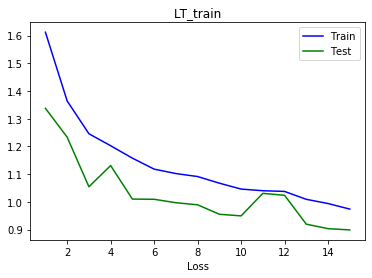

In [49]:
import matplotlib.pyplot as plt
loss = history.history['loss']
epochs = range(1, len(loss)+1)
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b-',label='Train')
plt.plot(epochs, val_loss,'g-',label='Test')
plt.title('LT_train')
plt.xlabel('Epohs')
plt.xlabel('Loss')
plt.legend()
plt.show()

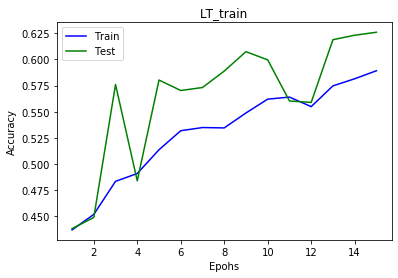

In [50]:
acc = history.history['accuracy']
epochs = range(1, len(acc)+1)
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b-',label='Train')
plt.plot(epochs, val_acc,'g-',label='Test')
plt.title('LT_train')
plt.xlabel('Epohs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [72]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.001),metrics = ['accuracy'])

history = model.fit(x_tr, y_tr, validation_data=(x_test, y_test), shuffle=True, epochs=15, batch_size=200, callbacks=[lrfunc])

Train on 7002 samples, validate on 10507 samples
Epoch 1/15
7002/7002 [==============================] - 2s 287us/step - loss: 1.6930 - accuracy: 0.4172 - val_loss: 1.4540 - val_accuracy: 0.4011
Epoch 2/15
7002/7002 [==============================] - 1s 177us/step - loss: 1.3720 - accuracy: 0.4487 - val_loss: 1.4098 - val_accuracy: 0.4011
Epoch 3/15
7002/7002 [==============================] - 1s 178us/step - loss: 1.3095 - accuracy: 0.4517 - val_loss: 1.3397 - val_accuracy: 0.4390
Epoch 4/15
7002/7002 [==============================] - 1s 179us/step - loss: 1.2230 - accuracy: 0.4871 - val_loss: 1.2564 - val_accuracy: 0.4845
Epoch 5/15
7002/7002 [==============================] - 1s 178us/step - loss: 1.1658 - accuracy: 0.5101 - val_loss: 1.2133 - val_accuracy: 0.5166
Epoch 6/15
7002/7002 [==============================] - 1s 186us/step - loss: 1.1368 - accuracy: 0.5186 - val_loss: 1.2301 - val_accuracy: 0.5117
Epoch 7/15
7002/7002 [==============================] - 1s 179us/step - los

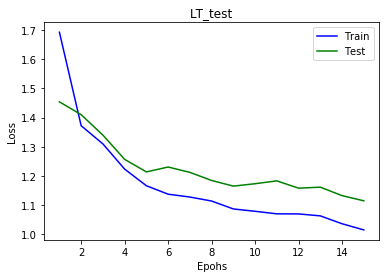

In [73]:
import matplotlib.pyplot as plt
loss = history.history['loss']
epochs = range(1, len(loss)+1)
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b-',label='Train')
plt.plot(epochs, val_loss,'g-',label='Test')
plt.title('LT_test')
plt.xlabel('Epohs')
plt.ylabel('Loss')
plt.legend()
plt.show()

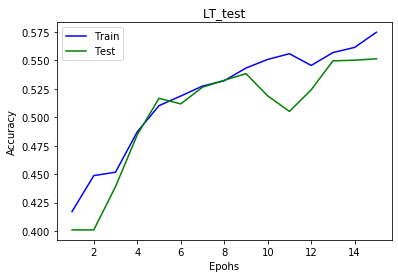

In [74]:
acc = history.history['accuracy']
epochs = range(1, len(acc)+1)
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b-',label='Train')
plt.plot(epochs, val_acc,'g-',label='Test')
plt.title('LT_test')
plt.xlabel('Epohs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_tr, y_tr)
print('準確率:',accuracy,'loss:',loss)
loss_test, accuracy_test = model.evaluate(x_test, y_test)
print('準確率:',accuracy_test,'loss:',loss_test)

In [75]:
loss_test, accuracy_test = model.evaluate(x_test, y_test)
print('準確率:',accuracy_test,'loss:',loss_test)

10507/10507 [==============================] - 1s 71us/step
準確率: 0.5512515306472778 loss: 1.1140801494396344
